In [1]:
import numpy as np
from matplotlib import pyplot as plt

from ExpInvQuEST import QuEST

%matplotlib notebook

## Set up true eigenvalues, following the example in Ledoit-Wolf

In [2]:
p = 800
n = 2000
r = p/n
z = np.linspace(0.0, 1.0, p)
z1 = z[z<=0.5]
exponent = 3
tau1 = 0.5 * (1.0 - (1.0 - (2.0 * z1) ** exponent) ** (1.0/exponent))
eigvals = 1.0 + 9.0 * np.concatenate([tau1, 1.0-tau1[::-1]])

tau = 1
gamma = np.sqrt((1/np.sinh(1/tau))+1)

true_eigvals = eigvals
true_eigvals.sort()

## Generate sample of noisy empirical eigenvalues

In [3]:
B = np.array([[np.exp(-np.abs(i-j)/(tau))
               for i in range(n)]
              for j in range(n)])

C = np.diag(np.sqrt(true_eigvals))

X = np.random.normal(size=(n, p))
A = 1.0/n * C.dot(X.T).dot(B).dot(X).dot(C)
empirical_eigvals = np.linalg.eigvalsh(A)
empirical_eigvals.sort()

## Determine outer edges of the support using empirical eigenvalues as a naive estimate

In [4]:
min_k, max_k = QuEST.edge(empirical_eigvals, r, gamma)
k = np.linspace(min_k*0.9999, max_k*1.0001, 1000)
print(min_k, max_k)

0.07353284263632166 32.91824610757975


## Calculate and plot QuEST function and it's random-directional derivative w.r.t. input eigenvalues

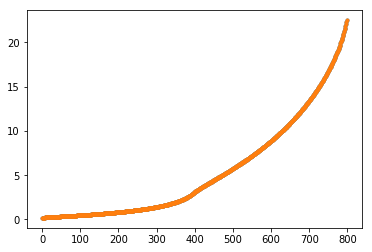

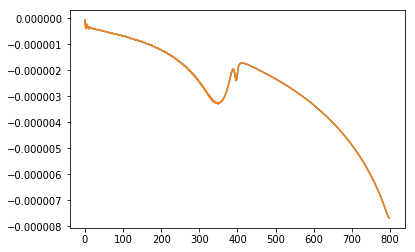

In [5]:
eigs = true_eigvals
q = QuEST.QuEST(eigs, r, gamma, k)
f,dfdl = q.Q()

deigs = np.random.uniform(low=-0.0001, high=0.0001, size=len(eigs))
q = QuEST.QuEST(eigs + deigs, r, gamma, k)
f2,_ = q.Q()

plt.figure()
plt.plot(f, '.')
plt.plot(f2, '.')
plt.figure()
plt.plot(f2 - f)
plt.plot(np.dot(dfdl,deigs))

## Invert the QuEST function using basinhopping

In [6]:
inv_quest = QuEST.inverse_quest(empirical_eigvals, r, gamma)

basinhopping step 0: f 18.2646
basinhopping step 1: f 18.2646 trial_f 2.44338e+21 accepted 0  lowest_f 18.2646
basinhopping step 2: f 2.3812 trial_f 2.3812 accepted 1  lowest_f 2.3812
found new global minimum on step 2 with function value 2.3812
basinhopping step 3: f 2.3812 trial_f 1.18345e+22 accepted 0  lowest_f 2.3812
basinhopping step 4: f 2.3812 trial_f 2.4816e+21 accepted 0  lowest_f 2.3812
basinhopping step 5: f 2.3812 trial_f 2.58026e+22 accepted 0  lowest_f 2.3812


In [7]:
inv_quest

                        fun: 2.3812009033010906
 lowest_optimization_result:      fun: 2.3812009033010906
     jac: array([-2.50027382e-02,  1.30379736e-03, -4.28845843e-03, -3.21368796e-03,
       -9.32859495e-03, -4.25389326e-03, -2.78238053e-02, -4.67069197e-02,
       -3.08580143e-03, -3.36943561e-03, -9.66860845e-03, -4.86574876e-03,
        1.31173473e-03, -1.94576531e-03, -3.06095585e-03, -2.42211683e-02,
       -3.61491727e-03, -9.97717742e-02,  1.82660579e-01, -8.79351182e-02,
        2.12487912e-01, -3.00925015e-02,  1.87771494e-01, -1.04205110e-02,
       -3.10856213e-02, -7.97964422e-03, -6.19580368e-02,  2.41141581e-01,
        1.30450541e-01, -3.77119359e-02, -5.22463567e-02,  1.30548597e-01,
       -2.13030797e-02,  1.85163036e-01, -6.78855744e-02, -8.30170231e-02,
        2.18647782e-01, -1.64656617e-02, -8.64291844e-02,  1.64068506e-01,
       -3.54378799e-02,  9.19754218e-02, -2.84908527e-02, -3.28304305e-02,
       -6.05103356e-02, -5.30049968e-02, -9.70659066e-02,  

## Plot the results

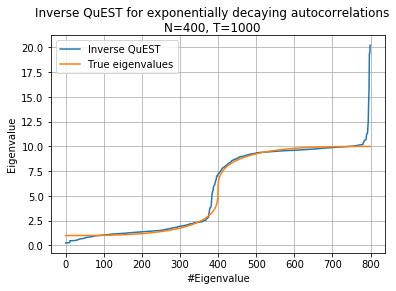

In [8]:
fig,ax = plt.subplots()
fig.suptitle("Inverse QuEST for exponentially decaying autocorrelations\nN=400, T=1000")
ax.plot(sorted(inv_quest.x), label="Inverse QuEST")
ax.plot(true_eigvals, label="True eigenvalues")
ax.set_xlabel("#Eigenvalue")
ax.set_ylabel("Eigenvalue")
ax.grid()
ax.legend()

## Compare empirical eigenvalues to QuEST calculated using true eigenvalues and the ones estimated using inverse procedure

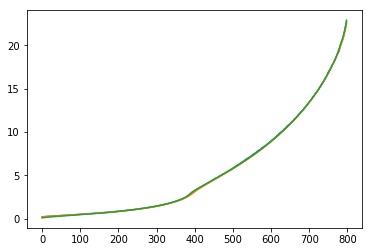

In [9]:
fig,ax = plt.subplots()
ax.plot(empirical_eigvals[:-1])
q = QuEST.QuEST(true_eigvals, r, gamma,k)
ax.plot(q.Q()[0])
q = QuEST.QuEST(inv_quest.x, r, gamma, k)
ax.plot(q.Q()[0])

## Compute square distances of empirical eigenvalues to QuEST given true eigenvalues

In [10]:
((QuEST.QuEST(true_eigvals, r, gamma, k).Q()[0] - empirical_eigvals[:-1])**2).sum()

3.366088435633229